Network X Code goes here, now we convert it into a graph

/var/folders/6y/vllmdlcj6x5fd8zhcmbh_v4w0000gn/T/ipykernel_9860/1601289652.py:61: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


Graph with 161 nodes and 166 edges
23.6 ms ± 3.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


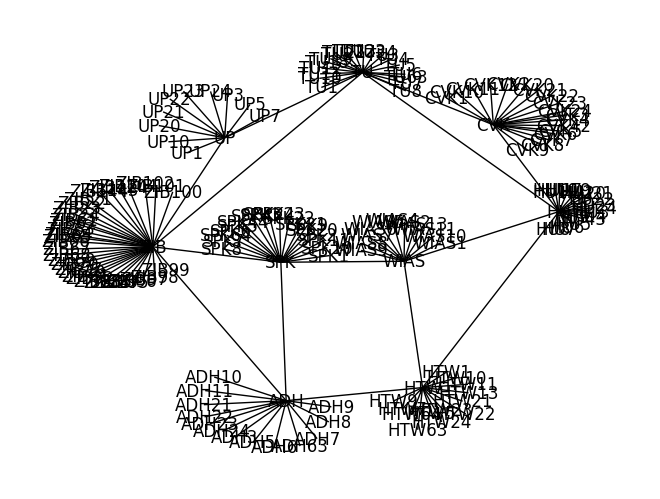

In [48]:
#Building a Network with Network

#1. Convert XML Network Dictionary into a networkx graph
#2. Create a 3 server, linked network and run shortest path
#3. Implement Random Placement Algorithm

import networkx as nx

import matplotlib.pyplot as plt

from ImportNetworkFromXML import *

G = nx.Graph()

path = 'Networks/'
options = ['abilene.xml' , 'janos-us.xml', 'brain.xml']

network_name = options[2]
from_xml = read_network(path+network_name)

nodes = from_xml[0]
links = from_xml[1]
demands = from_xml[2]

#Test the imported networks
#print_test(network_name,nodes,links,demands)



for node in nodes:
    node_id = nodes[node].get("id")
    x_cor = nodes[node].get("x_cor")
    y_cor = nodes[node].get("y_cor")
    G.add_node(node_id, pos=(x_cor, y_cor))


for link in links.keys():
    source = links[link].get("source")
    for source_node in nodes:
        if nodes[source_node].get('id') == source:
            break
    dest = links[link].get("destination")
    for dest_node in nodes:
        if nodes[dest_node].get('id') == dest:
            break
    capacity = links[link].get("capacity")
    cost = links[link].get("cost")
    G.add_edges_from([(source, dest, {'capacity': capacity, 'cost': cost})])


nx.draw(G, nx.get_node_attributes(G, 'pos'), with_labels=True, node_size=0)
#print(nx.dijkstra_path(G,'UP10', 'ADH10'))


# final all shortest path pairs
sp = dict(nx.all_pairs_shortest_path(G))
#print(sp)


#print network info
print(nx.info(G))

%timeit nx.closeness_centrality(G)


# Network statistics
There are many useful functions to calculate network stats for you.

## Global level stats
1. Density
2. Avg. shortest path length
3. Avg. clustering coefficient
4. Assortativity

In [41]:
#Print network stats
print('Density:', nx.density(G))

print('Avg. shortest path length:', nx.average_shortest_path_length(G))

print('Avg. clustering coefficient:', nx.average_clustering(G))

print('Assortativity', nx.degree_assortativity_coefficient(G))

Density: 0.012888198757763975
Avg. shortest path length: 3.3471273291925465
Avg. clustering coefficient: 0.0004543557502040666
Assortativity -0.6838401153159627


In [42]:
import numpy as np
import pandas as pd

erdos_assortativity_list = list()
conf_assortativity_list = list()

n = G.number_of_nodes() # number of nodes
p = 2.*G.number_of_edges()/(n*n-1) # probability of edge creation
print (n)
print(p)

degree_dist = np.asarray(list(dict(G.degree()).values()))
degree_dist

for i in range(100): # randomly sample random graphs 100 times
    erdos_rg = nx.erdos_renyi_graph(n, p, seed=np.random.randint(10))
    conf_rg = nx.Graph(nx.configuration_model(degree_dist, seed=np.random.randint(10))) # convert `MultiGraph` to `Graph`
    # calculate assortativity
    erdos_assortativity_list.append(nx.degree_assortativity_coefficient(erdos_rg))
    conf_assortativity_list.append(nx.degree_assortativity_coefficient(conf_rg))

print('Erdos-Renyi assortativity:', np.mean(erdos_assortativity_list), np.std(erdos_assortativity_list, ddof=1))
print('Conf. model assortativity:', np.mean(conf_assortativity_list), np.std(conf_assortativity_list, ddof=1))
print('Real network value:', nx.degree_assortativity_coefficient(G))

#Now you see that there's a much higher tendency of the low degree nodes (mostly members) in ___karate club network___ to connect 
# with high degree nodes (mostly leaders). We can then interpret that there may be a core-periphery or leader-member structure. 
# (We cannot be sure about this from this very simple approach though!)

161
0.012808641975308642
Erdos-Renyi assortativity: -0.021000716506737505 0.04937722154315033
Conf. model assortativity: -0.19132189181117465 0.05887662624160157
Real network value: -0.6838401153159627


# Page Rank Algorithm
Ranking nodes based on various strategies is a common thing in measuring node importance. PageRank is one of the most successful one and has still been used in both the industry and academia. Usually, PageRank is applied in a directed network, where an edge has a direction. For example, webpage A has a link to webpage B but not the other way around. Therefore in the network of WWW, we only have A → B but NOT B → A.

## Reference:
Page, Lawrence and Brin, Sergey and Motwani, Rajeev and Winograd, Terry (1999) The PageRank Citation Ranking: Bringing Order to the Web. Technical Report. Stanford InfoLab.

## Build network
Network data from http://tuvalu.santafe.edu/~aaronc/datacode.htm

In [43]:
pr = nx.pagerank(G, alpha=0.85)

pr_df = pd.DataFrame([{'name': k, 'value': v} for k, v in pr.items()])
pr_df.head()
pr_df.sort_values('value', ascending=False)

,name,value
127,ZIB,0.102734
85,TU,0.060396
47,HU,0.060219
66,SPK,0.058425
14,CVK,0.056753
...,...,...
51,HU19,0.003258
50,HU17,0.003258
48,HU1,0.003258
56,HU23,0.003258


# Approximations and Heuristics
Approximations of graph properties and Heuristic methods for optimization.

# import
These functions can be accessed using networkx.approximation.function_name

They can be imported using from networkx.algorithms import approximation or from networkx.algorithms.approximation import function_name

# Treewidth
Functions for computing treewidth decomposition.

Treewidth of an undirected graph is a number associated with the graph. It can be defined as the size of the largest vertex set (bag) in a tree decomposition of the graph minus one.

Wikipedia: Treewidth

treewidth_min_degree(G): Returns a treewidth decomposition using the Minimum Degree heuristic.

In [44]:
from networkx.algorithms import approximation as algos
algos.treewidth_min_degree(G)

(3, <networkx.classes.graph.Graph at 0x116ee3c40>)